In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['stacking-kur0cky-also-stacked-xgb-in-stacking-tr', 'LANL-Earthquake-Prediction']


In [2]:
stacking_train = pd.read_csv('../input/stacking-kur0cky-also-stacked-xgb-in-stacking-tr/stacking_train.csv')
stacking_train.describe()

,TTF,pred_RF,pred_ET,pred_glm,pred_catboost,pred_xgb,kien_pred_RF,kien_pred_ET,kien_pred_glm,kien_pred_xgb,kien_huber_ttf,kur0cky_quant_ttf_0.1,kur0cky_quant_ttf_0.3,kur0cky_quant_ttf_0.5,kur0cky_quant_ttf_0.7,kur0cky_quant_ttf_0.9,kien_quant_ttf_0.1,kien_quant_ttf_0.3,kien_quant_ttf_0.5,kien_quant_ttf_0.7,kien_quant_ttf_0.9,after_pulse_prob,kur0cky_quant_tff_0.1,kur0cky_quant_tff_0.3,kur0cky_quant_tff_0.5,kur0cky_quant_tff_0.7,kur0cky_quant_tff_0.9,kien_quant_tff_0.1,kien_quant_tff_0.3,kien_quant_tff_0.5,kien_quant_tff_0.7,kien_quant_tff_0.9,kien_huber_tff,stacked_xgb
count,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4178.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4194.000000
mean,5.682699,5.758153,5.742604,5.716446,5.123263,5.333415,5.741307,5.721472,6.305183,5.234117,5.413169,3.143499,4.310691,5.427267,6.707043,8.764470,2.945569,4.376431,5.496208,6.767742,9.060873,0.027046,4.512330,4.945736,5.403969,6.101411,7.055052,4.194810,4.729167,5.317888,6.188218,7.186722,5.293287,5.387037
std,3.673145,2.620799,2.567018,2.528455,2.541697,2.694538,2.343680,2.292353,10.966397,2.525314,2.466256,2.047706,2.212549,2.522608,2.811748,2.648059,1.761767,2.177574,2.429244,2.545580,2.236461,0.135534,2.713052,2.869205,3.036307,3.315072,3.608264,2.470360,2.689525,2.869906,3.066313,3.159384,2.898319,2.778321
min,0.006398,0.646712,0.769640,0.000000,0.000000,-0.598674,1.455061,1.674254,0.000000,0.488528,0.441740,-0.842912,-0.079104,-0.222278,0.263315,2.474225,0.188639,0.227050,0.289424,1.468455,4.248738,0.005792,0.130393,0.200169,0.260634,0.550178,0.543591,0.270489,0.327683,0.507737,0.923834,0.141124,0.318152,-0.557521
25%,2.634173,3.403767,3.415299,3.717164,2.815856,2.799568,3.587802,3.598042,3.755155,2.769156,3.108319,1.200237,2.338272,3.139465,4.220408,6.348601,1.205634,2.389695,3.200596,4.311116,7.019301,0.005799,1.943614,2.405972,2.645884,2.941195,3.543886,1.716715,2.287940,2.623445,3.191354,4.270358,2.519895,2.855434
50%,5.354847,5.512243,5.427352,5.227056,4.931563,5.176051,5.411162,5.311909,5.368902,4.845114,5.166833,2.729809,3.999141,5.320172,6.748786,8.887922,2.403394,3.836421,5.166628,6.742223,9.185815,0.005816,4.724633,4.934168,5.528010,6.432726,7.233052,4.422464,4.723484,5.434810,6.445440,7.396092,5.467739,5.223008
75%,8.175924,8.096189,8.057115,7.938314,7.389564,7.636558,7.985098,7.928517,7.829273,7.572857,7.444843,5.008913,6.218403,7.569337,9.081851,11.173708,4.712959,6.243751,7.516740,8.931167,11.012278,0.005901,6.823000,7.346774,7.865569,8.719528,10.252780,6.290030,7.006169,7.728967,8.691580,9.903631,7.755603,7.663082
max,16.103196,11.753529,11.326413,11.893436,9.966337,11.697917,11.182868,10.762086,325.040335,11.038394,12.890500,7.311899,9.263313,10.741337,13.818831,14.428009,7.274469,9.114176,12.233686,13.366299,14.684262,0.996840,12.956453,12.479889,13.294973,14.304241,14.761703,9.957582,10.924949,11.772363,13.636570,13.911141,11.968691,13.460916


## 原点回帰「子持ち昆布プロット」

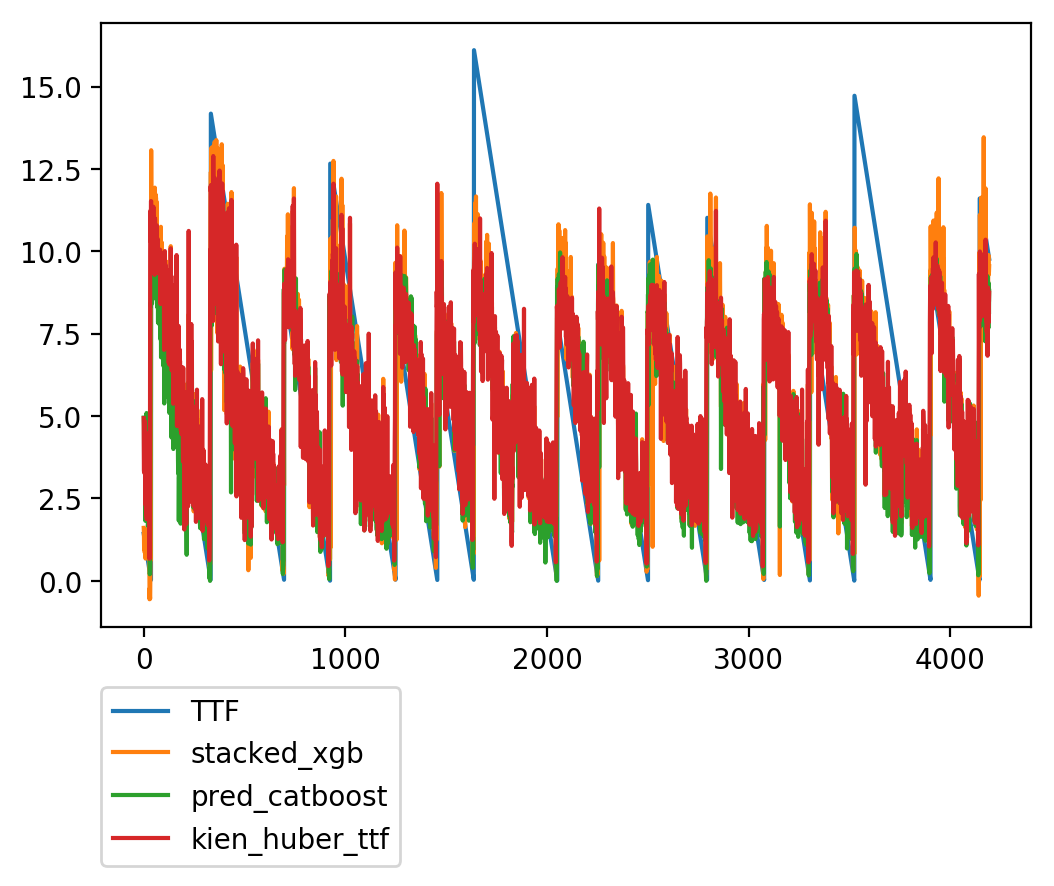

In [3]:
fig = plt.figure(dpi = 200)
plt.plot(stacking_train['TTF'])
plt.plot(stacking_train['stacked_xgb'])
plt.plot(stacking_train['pred_catboost'])
plt.plot(stacking_train['kien_huber_ttf'])
plt.legend(bbox_to_anchor=(0, -0.1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()


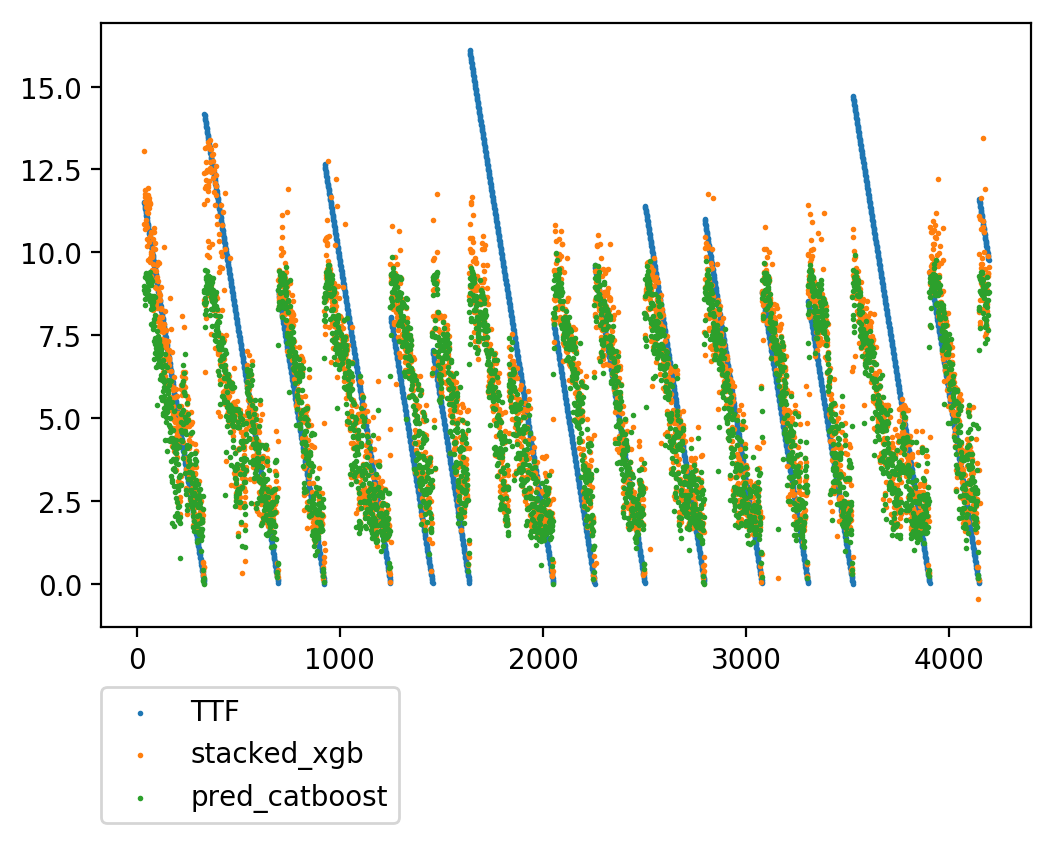

In [4]:
idx = range(0, len(stacking_train))
fig = plt.figure(dpi = 200)
plt.scatter(idx[37:], stacking_train['TTF'][37:], s = 1)
plt.scatter(idx[37:], stacking_train['stacked_xgb'][37:], s = 1)
plt.scatter(idx[37:], stacking_train['pred_catboost'][37:], s = 1)
plt.legend(bbox_to_anchor=(0, -0.1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

## 1st Waveを除いたMAE(参考値)
### なんの参考にもならない？？

In [5]:
np.mean(np.abs(stacking_train['TTF'][37:] - stacking_train['stacked_xgb'][37:]))

1.852037419241264